# Data Frame Description

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#In Data set have space so remove extra space
for col in df.columns:
    if df[col].dtype!= 'int64':
        df[col]=df[col].apply(lambda x: x.replace(" ",""))
        df[col]=df[col].apply(lambda x: x.replace(" ",""))
        df[col]=df[col].apply(lambda x: x.replace(".",""))

In [4]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Observation:

Numerical Data:

1.Age

2.Fnlwgt

3.Education_num

4.Capital_gain

5.Capital_loss

6.Hours_per_week

Categorical Data:

1.Workclass

2.Education

3.Marital_status

4.Occupation

5.Relationship

6.Race

7.Sex

8.Native_country

9.Income

# Checking null values in the dataframe

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

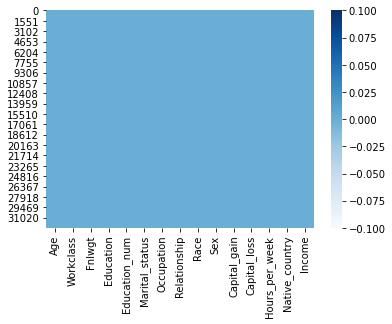

In [8]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [9]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in Age is: 0.0
% data missing in Workclass is: 0.0
% data missing in Fnlwgt is: 0.0
% data missing in Education is: 0.0
% data missing in Education_num is: 0.0
% data missing in Marital_status is: 0.0
% data missing in Occupation is: 0.0
% data missing in Relationship is: 0.0
% data missing in Race is: 0.0
% data missing in Sex is: 0.0
% data missing in Capital_gain is: 0.0
% data missing in Capital_loss is: 0.0
% data missing in Hours_per_week is: 0.0
% data missing in Native_country is: 0.0
% data missing in Income is: 0.0


# Checking Duplicates

In [10]:
df.duplicated().sum()

24

There are 24 duplicate rows which needs to be removed

In [11]:
df.drop_duplicates().shape[0]

32536

# Exploratory Data Analysis:

# Univariate Analysis(Numerical Data):

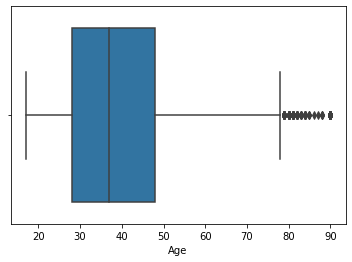

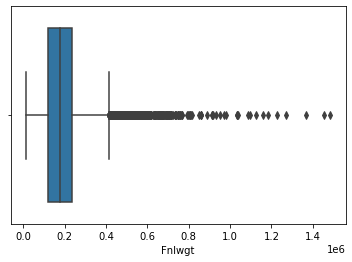

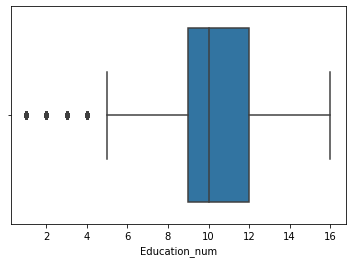

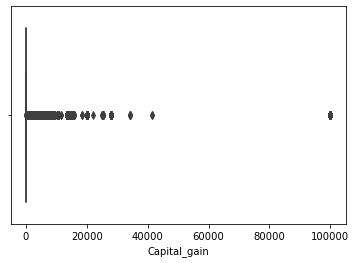

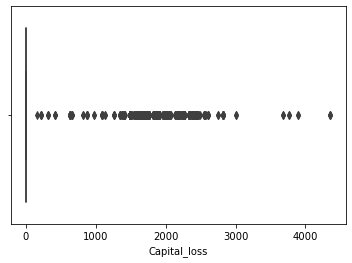

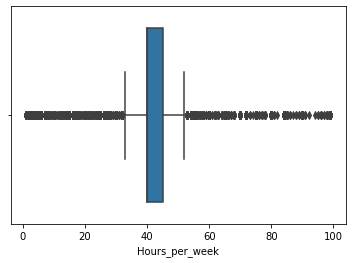

In [12]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(x=i,data=df)
        plt.show()                               

Observation(For continuous):
    
1.Minimum age is around 15 and maximum around 90 and the average age is around 38

2.Maximum captial gain is around 100000 and minimum zero.

3.Maximum captial gain is around 4500 and minimum zero.

4.Maximum Hours_per_week is aeound 90 and minimum 0 and average 45

# Univariate Analysis(Categorical Data):

In [13]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        print(f'================================{i}===================================')
        print(df[i].value_counts())
        print('\n')

================================Workclass===================================
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64


================================Education===================================
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64


================================Marital_status===================================
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated            

Observation:

1.Native_Country, Occupation, Workclass has missing values represented by ? and needs to be treated.

2.Education-
9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
Create Elementary object for 1st-4th, 5th-6th, 7th-8th

3.Marital Status-
Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
Divorced, separated again comes under category separated.

4.Workclass-
Self-emp-not-inc, Self-emp-inc comes under category self employed
Local-gov,State-gov,Federal-gov comes under category goverment emloyees

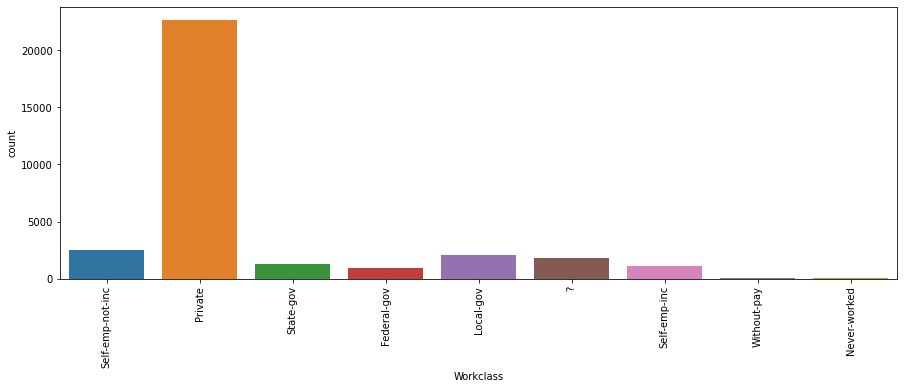

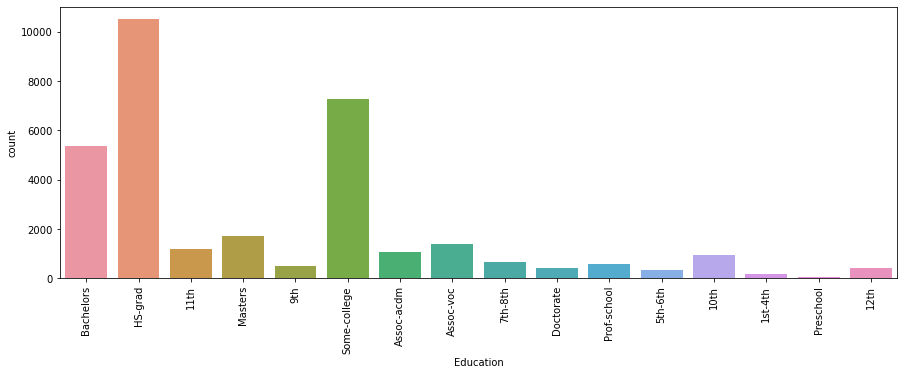

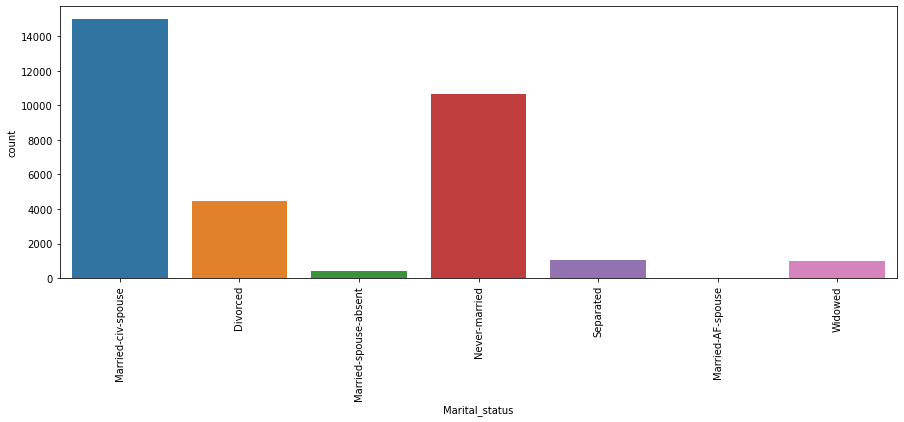

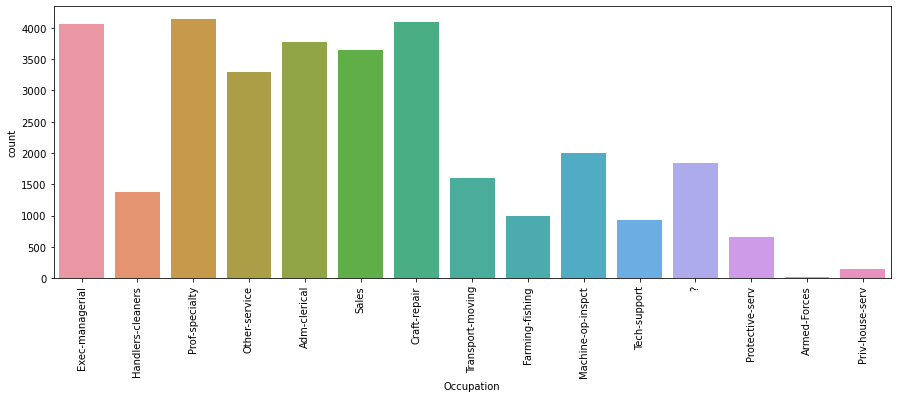

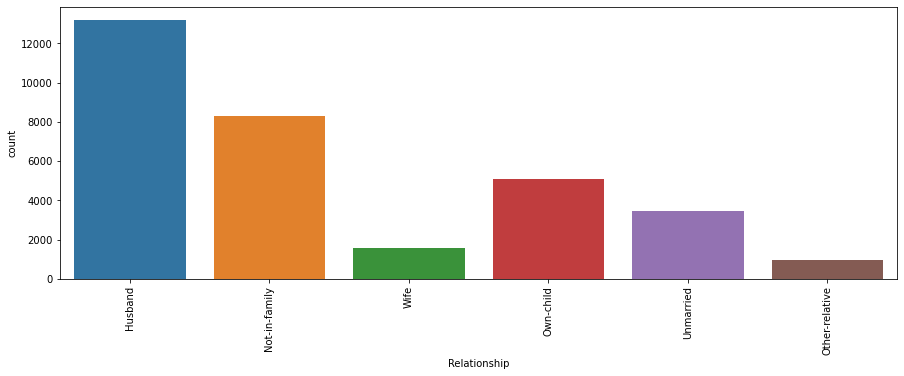

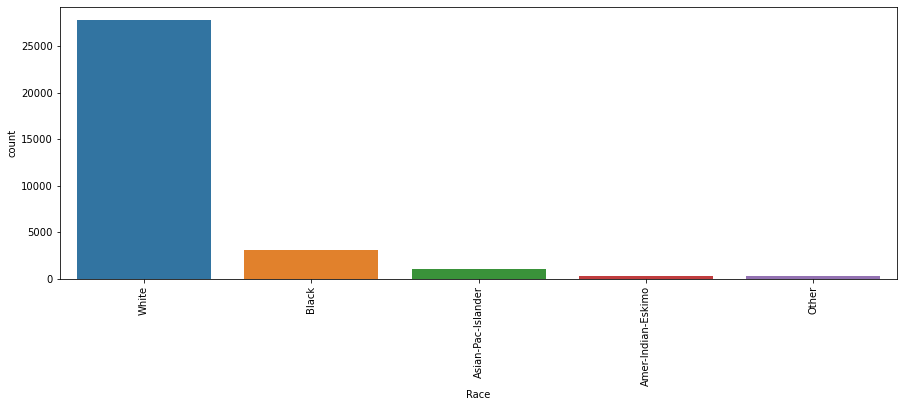

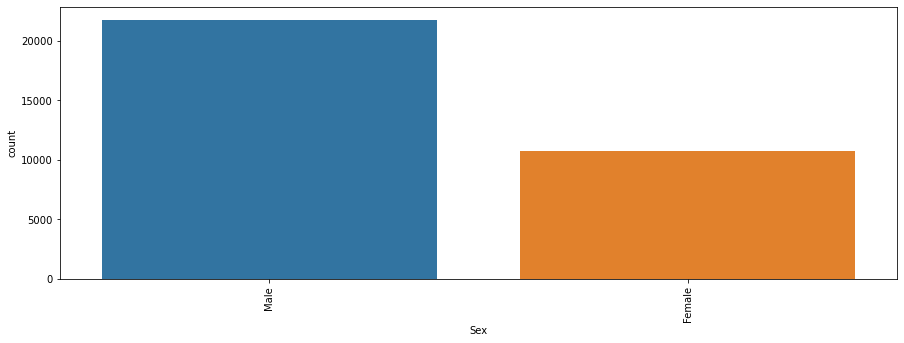

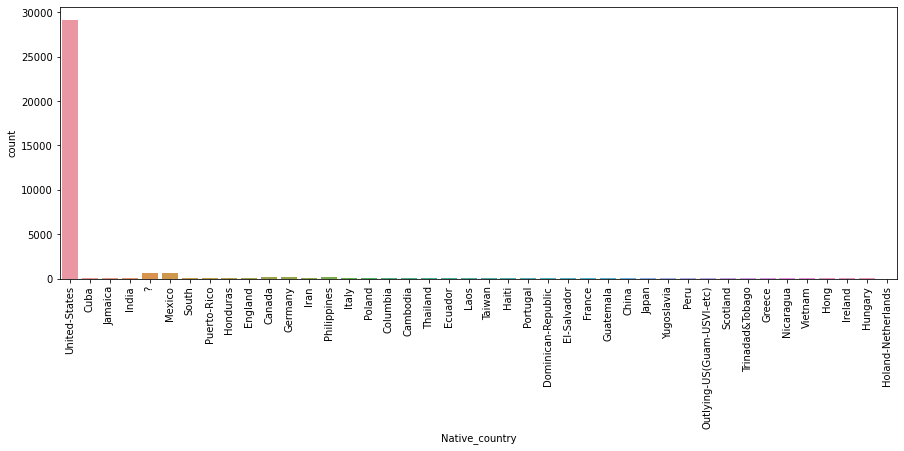

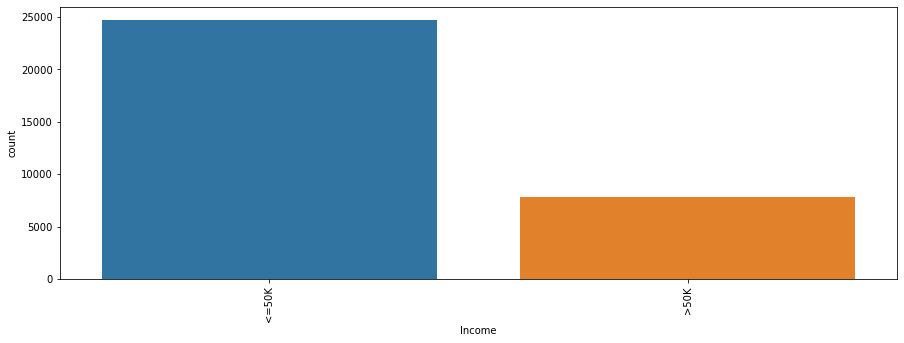

In [14]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        plt.figure(figsize=(15,5))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show()

Observation:
    
1.The dataset contains maximum people belonging to Workclass "Private".

2.The dataset contains maximum people having education as 'HS-grad' followed by 'Some-College'.

3.The dataset cosists maximum people belonging to Marital_status as "Married".

4.The dataset cosists maximum people belonging to Occupation as "Prof-Speciality" followed by 'Craft Repair' and 'Ex-Managerial'.

5.The dataset contains maximum people belonging to race "White".

6.The dataset contains maximum people belonging to sex "Male".

7.The dataset contains maximum people belonging to Native_country "United-States".

8.The dataset contains maximum people who are earning below 50k.

In [15]:
# Converting Target data to Numerical Data For better EDA
df['Income']=df['Income'].replace('<=50K',0)
df['Income']=df['Income'].replace('>50K',1)

# Bivariate Analysis

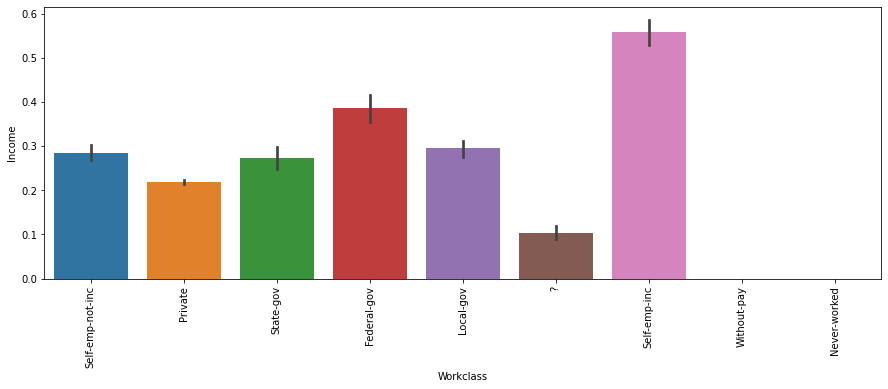

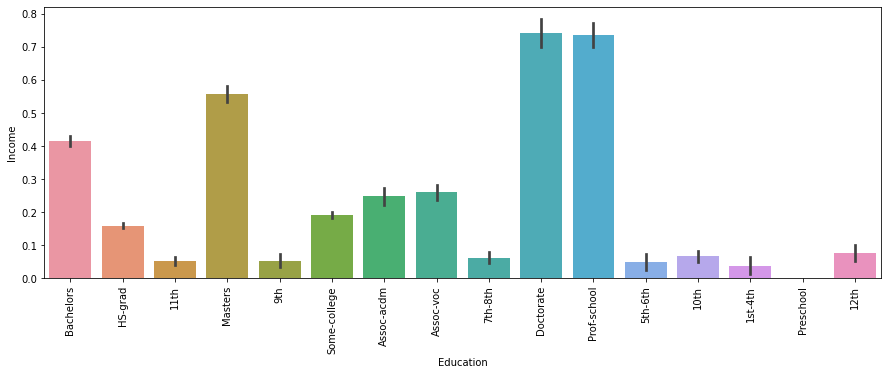

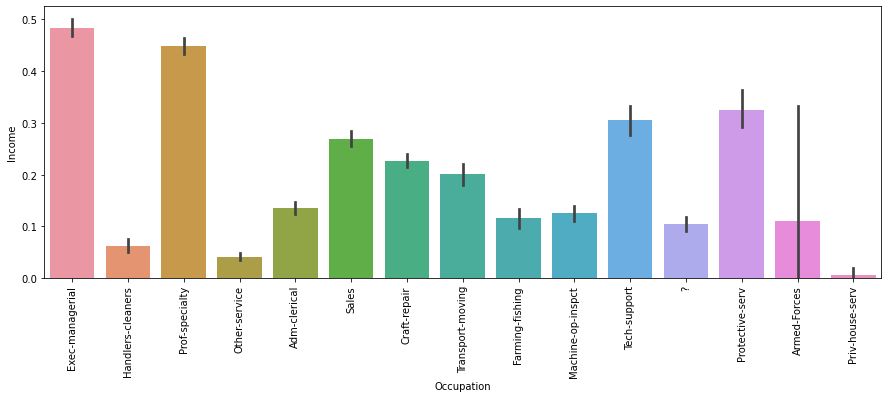

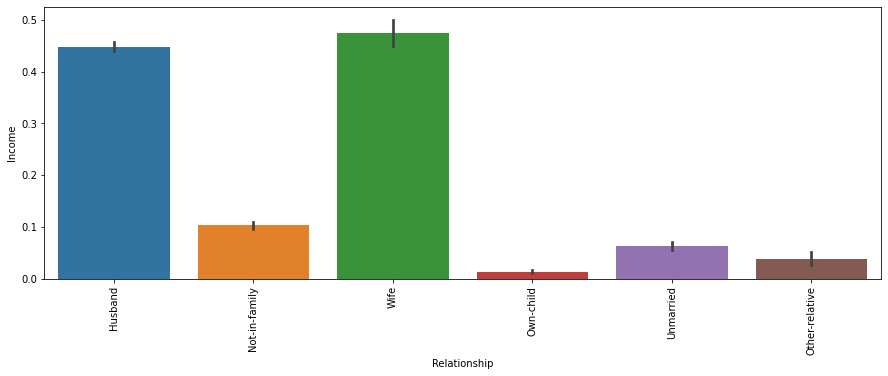

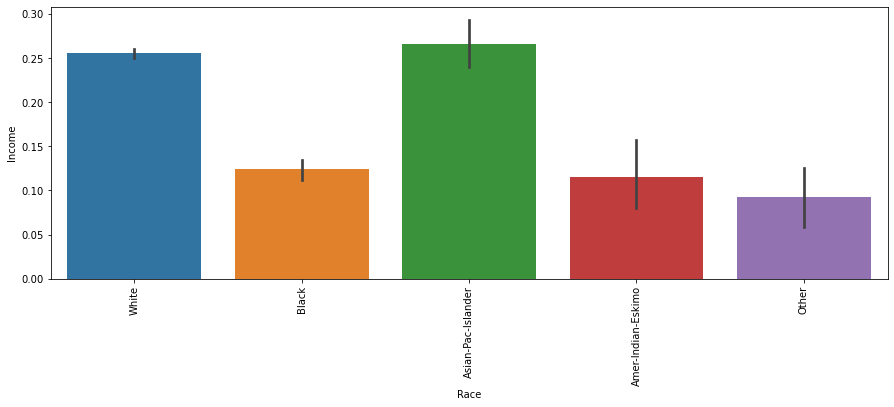

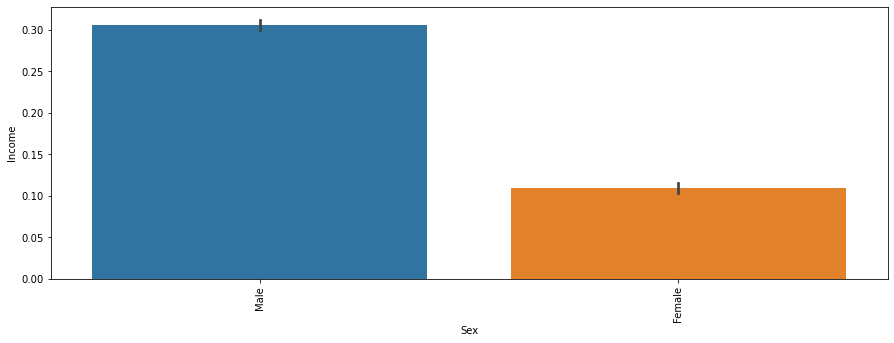

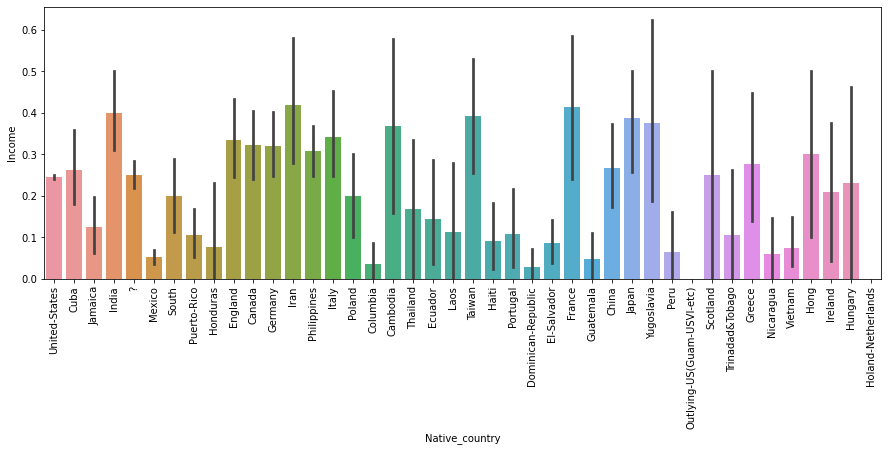

In [17]:
cat=['Workclass','Education','Occupation','Relationship','Race','Sex','Native_country']
for i in cat:
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=90)
    sns.barplot(x=i,y='Income',data=df)
    plt.show()

Observation:
    
1.Self-emp-inc is earning more in comparision to others.

2.Doctorate,Masters and Prof-School are earning more.

3.Wife is having higher income than husband.

4.Asian-Pac-Islander and White are earning more compared to other.

5.Male earns more than female.


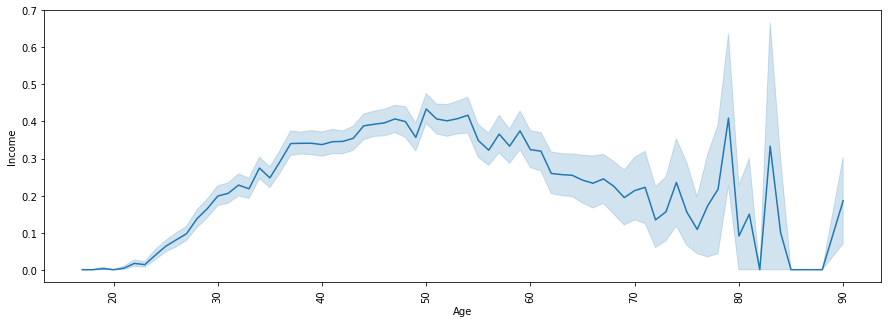

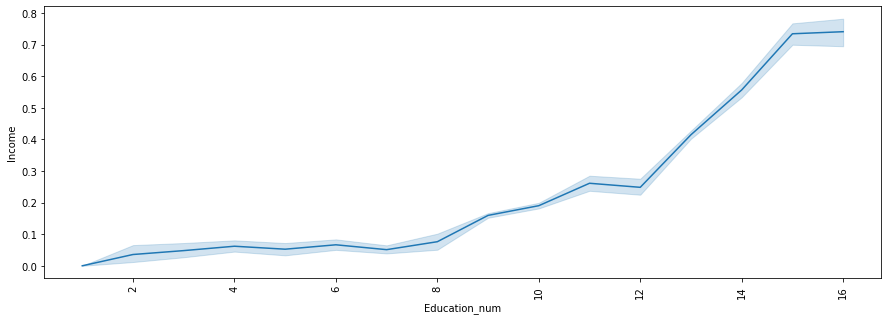

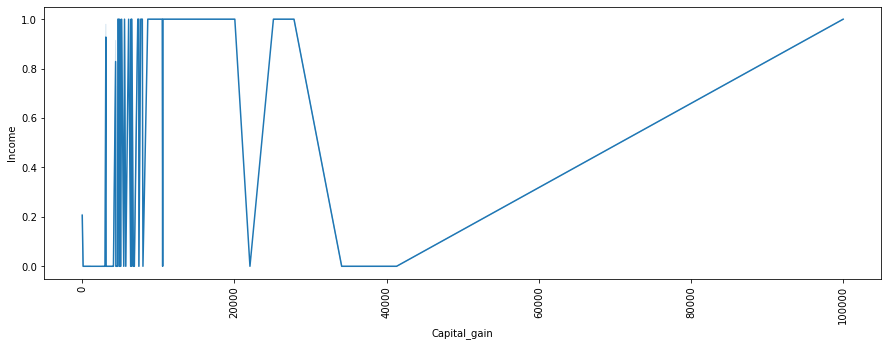

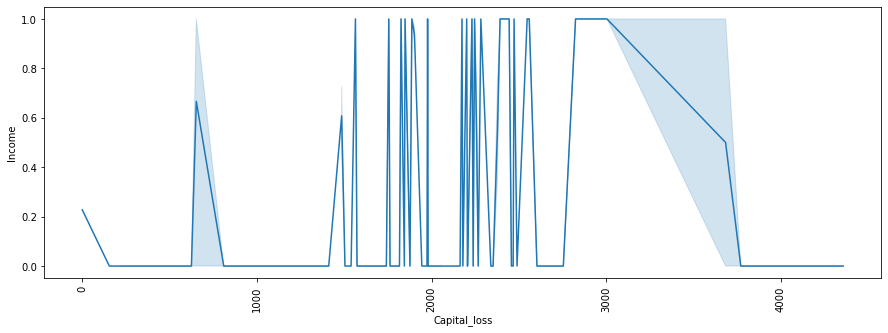

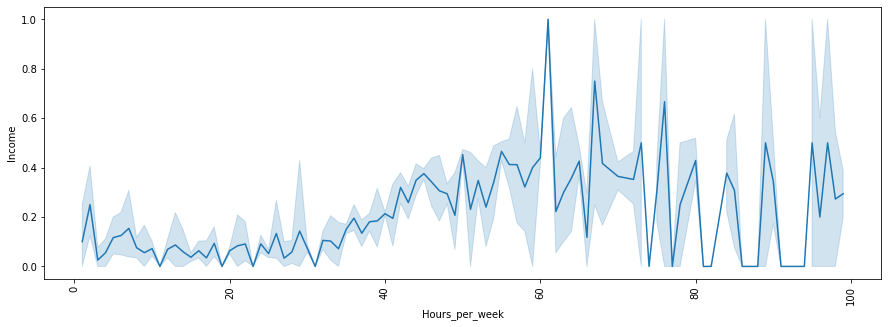

In [21]:
num=['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']
for i in num:
        plt.figure(figsize=(15,5))
        plt.xticks(rotation=90)
        sns.lineplot(x=i,y='Income',data=df)
        plt.show()

Observation:
    
1. With increase in age income increases.

2. With increase in education income increases.

3. Cannot draw any conclusion for Capital_loss and Captial_gain.

4. With increase in Hours_per_week income increases.

# Data Set Description

In [22]:
round(df.describe(),2)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.00,32560.00,32560.00,32560.00,32560.00,32560.00,32560.00
mean,38.58,189781.81,10.08,1077.62,87.31,40.44,0.24
std,13.64,105549.76,2.57,7385.40,402.97,12.35,0.43
min,17.00,12285.00,1.00,0.00,0.00,1.00,0.00
25%,28.00,117831.50,9.00,0.00,0.00,40.00,0.00
50%,37.00,178363.00,10.00,0.00,0.00,40.00,0.00
75%,48.00,237054.50,12.00,0.00,0.00,45.00,0.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00,1.00


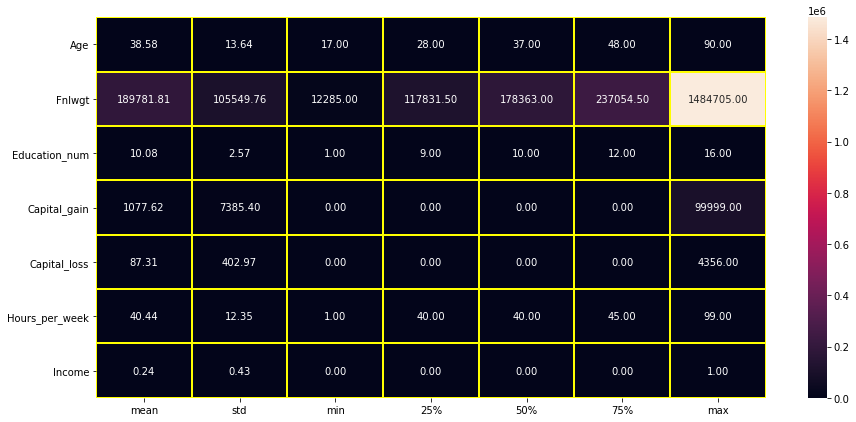

In [23]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:
    
1.Fnlwgt has difference between max and 75% indicating heavy ouliers might be present.

2.Capital_gain has difference between max and 75% indicating heavy ouliers might be present.

3.Capital_loss has difference between max and 75% indicating heavy ouliers might be present.

4.Median and mean has values very close indicating very less skewness present.


# Filling ? values

In [26]:
df['Workclass'].mode()

0    Private
dtype: object

In [27]:
df['Occupation'].mode()

0    Prof-specialty
dtype: object

In [28]:
df['Native_country'].mode()

0    United-States
dtype: object

In [29]:
#filling '?' with mode
df['Workclass']=df['Workclass'].replace('?','Private')
df['Occupation']=df['Occupation'].replace('?','Prof-specialty')
df['Native_country']=df['Native_country'].replace('?','United-States')

In [30]:
df['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [31]:
df['Occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [32]:
df['Native_country'].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [33]:
#treating the Marital_status column
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['Marital_status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['Marital_status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['Marital_status'].value_counts()

Married          15417
Never-married    10682
Separated         5468
Widowed            993
Name: Marital_status, dtype: int64

In [34]:
#treating the Education column
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['Education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['Education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)
df['Education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5354
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: Education, dtype: int64

In [35]:
df[['Education', 'Education_num']].groupby(['Education'], as_index=False).mean().sort_values(by='Education_num', ascending=False)

,Education,Education_num
3,Doctorate,16.000000
7,Prof-school,15.000000
5,Masters,14.000000
2,Bachelors,13.000000
0,Assoc-acdm,12.000000
1,Assoc-voc,11.000000
8,Some-college,10.000000
4,HS-grad,8.436559
9,elementary_school,3.416739
6,Preschool,1.000000


In [36]:
#Education num and education are giving similar information.Hence keeping only one of the two.
df.drop(['Education'],axis=1,inplace=True)

In [37]:
#Treating the Workclass column
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['Workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['Workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['Workclass'].value_counts()

Private           24532
Govt_employees     4350
Self_employed      3657
Without-pay          14
Never-worked          7
Name: Workclass, dtype: int64

# Correlation

In [38]:
df.corr()['Income'].sort_values()

Fnlwgt           -0.009481
Capital_loss      0.150523
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

<AxesSubplot:>

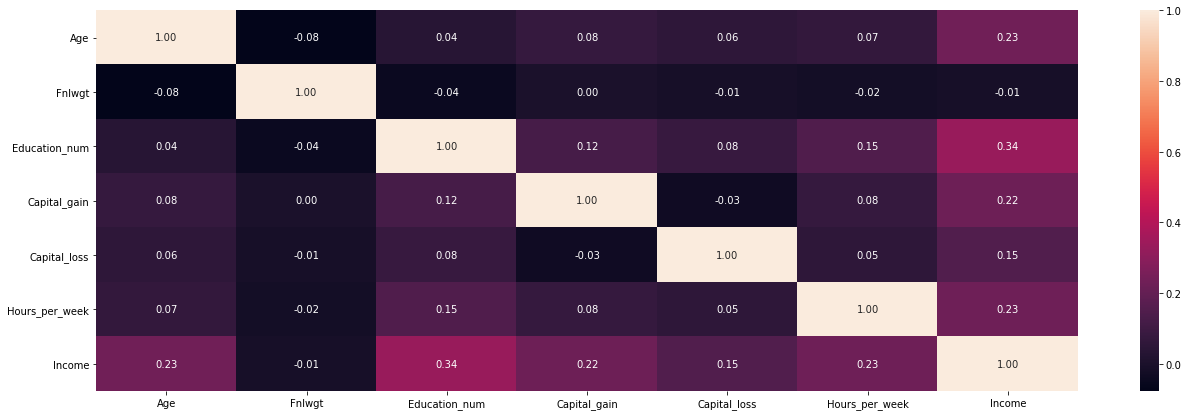

In [39]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
Education_num has thee highest correlation with the target and Fnlwgt has the least.

# Checking Skewness

In [40]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

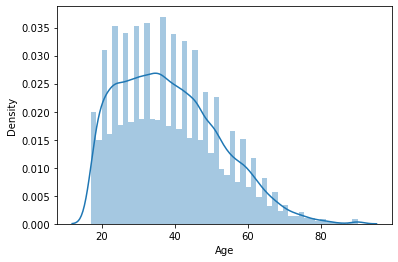

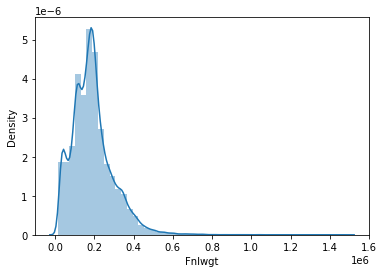

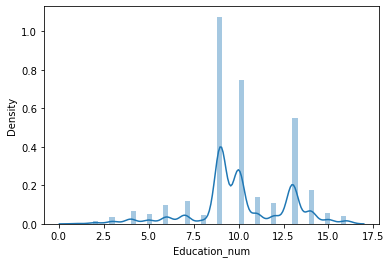

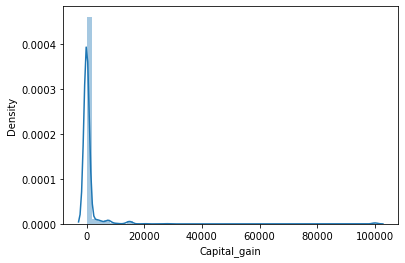

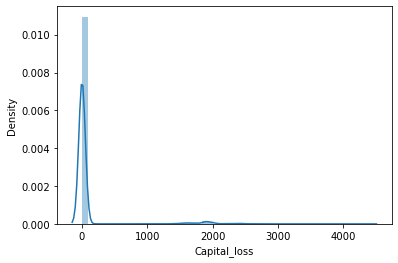

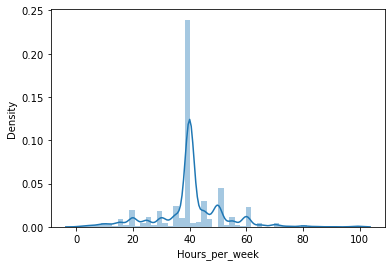

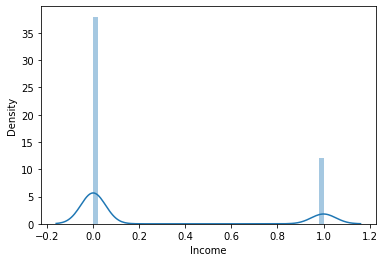

In [41]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

Observation:
Education_num is left skewed while other features are right skewed.Capital_gain and Capital_loss is heavily right skewed.

# Outliers Checking:

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Fnlwgt            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Education_num      AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Capital_gain      AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Capital_loss      AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Hours_per_week       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Income            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

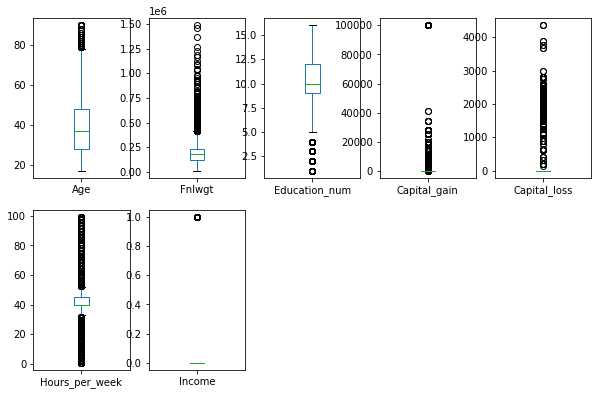

In [42]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

Observation:
Continuous features(Fnlwgt,Capital_gain & Capital_loss) have lots of outliers present and needs to be treated

# Checking if the target is balanced or not

In [43]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

Observation: Target feature need to be balanced

# Data Preprocessing

In [44]:
#removing unnecessary column Education
df.drop(['Fnlwgt'],axis=1,inplace=True)

# REMOVING OUTLIERS:

In [84]:
#using quantile method
out=['Age','Capital_gain','Capital_loss','Hours_per_week']
for i in out:
    ub=df[i].quantile(0.99)
    lb=df[i].quantile(0.01)
    print(i)
    print('upper bound:',ub)
    print('lower bound:',lb)
    print('\n')

Age
upper bound: 73.0
lower bound: 17.0


Capital_gain
upper bound: 15024.0
lower bound: 0.0


Capital_loss
upper bound: 1980.0
lower bound: 0.0


Hours_per_week
upper bound: 70.0
lower bound: 10.0




In [46]:
df_new=df[(df['Age']<=74.0)&(df['Age']>=17)]
df_new=df[(df['Capital_gain']<=15024.0)&(df['Capital_gain']>=0)]
df_new=df[(df['Capital_loss']<=1980.0)&(df['Capital_loss']>=0)]
df_new=df[(df['Hours_per_week']<=80.0)&(df['Hours_per_week']>=8.0)]

In [47]:
df_new.shape[0]

32057

In [48]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
data_loss

1.5448402948402948

Since only 1.5% data is lost due to ouliers removal we can consider to remove outliers

In [49]:
df=df_new

# Converting string data to numeric data

In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

# Skewness Treatment:

In [51]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [52]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.90480195,  2.03420477,  1.16700192, ..., -0.22124936,
        -2.35577149,  0.29501092],
       [ 0.10924575,  0.05485364, -0.46645308, ..., -0.22124936,
        -0.05724663,  0.29501092],
       [ 1.0788376 ,  0.05485364, -1.20359624, ..., -0.22124936,
        -0.05724663,  0.29501092],
       ...,
       [ 1.35167685,  0.05485364, -0.46645308, ..., -0.22124936,
        -0.05724663,  0.29501092],
       [-1.35899915,  0.05485364, -0.46645308, ..., -0.22124936,
        -1.79098776,  0.29501092],
       [ 1.02174592,  2.03420477, -0.46645308, ..., -0.22124936,
        -0.05724663,  0.29501092]])

In [53]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.6121072 , 0.60046619, 0.75476717, ..., 0.        , 0.05917052,
        0.54016718],
       [0.44440152, 0.30486556, 0.45666447, ..., 0.        , 0.41491932,
        0.54016718],
       [0.64879445, 0.30486556, 0.32213713, ..., 0.        , 0.41491932,
        0.54016718],
       ...,
       [0.7063098 , 0.30486556, 0.45666447, ..., 0.        , 0.41491932,
        0.54016718],
       [0.13489099, 0.30486556, 0.45666447, ..., 0.        , 0.1465836 ,
        0.54016718],
       [0.63675935, 0.60046619, 0.45666447, ..., 0.        , 0.41491932,
        0.54016718]])

# Balancing the dataset

In [54]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [55]:
y.value_counts()

0    24312
1    24312
Name: Income, dtype: int64

# Model Building:

In [56]:
# Since our outcome has only two variable we will use binary classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 0 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 1 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 8 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 13 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 22 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 23 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 30 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 32 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 35 The model performs very well
Training Accuracy Score is: 80.6
Te

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression Model

In [59]:
#selecting random state=108
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=108,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 80.7
Testing Accuracy Score is: 80.7


# CROSS VALIDATION OF THE MODEL

In [60]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.806083415597236
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 3 the cv score is 0.8060628496215861
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 4 the cv score is 0.8057337940111879
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 5 the cv score is 0.8059395786430414
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 6 the cv score is 0.8058571898650873
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 7 the cv score is 0.8059602625322358
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 8 the cv score is 0.806083415597236
training score : 0.8066531273297514
testing score : 0.8070951156812339


At crossfold= 9 the cv score is 0.8059398228254191
training score : 0.8066531273297514
testing score : 0.8070951156812339




In [61]:
#selecting cv=3 as it is very close to testing score
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=3)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.8524421593830335
the cv score is 0.8420944389601842
[[4199  674]
 [ 761 4091]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4873
           1       0.86      0.84      0.85      4852

    accuracy                           0.85      9725
   macro avg       0.85      0.85      0.85      9725
weighted avg       0.85      0.85      0.85      9725



KNeighborsClassifier()
accuracy score: 0.8462724935732647
the cv score is 0.8482025337282001
[[3814 1059]
 [ 436 4416]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      4873
           1       0.81      0.91      0.86      4852

    accuracy                           0.85      9725
   macro avg       0.85      0.85      0.85      9725
weighted avg       0.85      0.85      0.85      9725



SVC()
accuracy score: 0.822827763496144
the cv score is 0.8189165844027642
[[3680 1193]
 [ 530 4322]

# Ensemble Techniques

# Ramdom Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=3)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.8858611825192803
the cv score is 0.8806967752550182
[[4327  546]
 [ 564 4288]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4873
           1       0.89      0.88      0.89      4852

    accuracy                           0.89      9725
   macro avg       0.89      0.89      0.89      9725
weighted avg       0.89      0.89      0.89      9725



# Adaboost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()     
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,adpred))
cv_score=cross_val_score(ad,x,y,cv=3)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,adpred))
print(classification_report(y_test,adpred))

accuracy score: 0.8486375321336761
the cv score is 0.8394619940769991
[[4038  835]
 [ 637 4215]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4873
           1       0.83      0.87      0.85      4852

    accuracy                           0.85      9725
   macro avg       0.85      0.85      0.85      9725
weighted avg       0.85      0.85      0.85      9725



# GradientBoosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=3)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.8641645244215939
the cv score is 0.852315728858177
[[4074  799]
 [ 522 4330]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4873
           1       0.84      0.89      0.87      4852

    accuracy                           0.86      9725
   macro avg       0.87      0.86      0.86      9725
weighted avg       0.87      0.86      0.86      9725



# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestClassifier()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


In [67]:
rf=RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=10)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=3)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.8580976863753214
the cv score is 0.8530972359328727
[[3950  923]
 [ 457 4395]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4873
           1       0.83      0.91      0.86      4852

    accuracy                           0.86      9725
   macro avg       0.86      0.86      0.86      9725
weighted avg       0.86      0.86      0.86      9725



In [68]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=3)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.8624547548535703
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 300}


In [69]:
gb=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=7)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.881439588688946
the cv score is 0.8782522822436769
[[4207  666]
 [ 487 4365]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4873
           1       0.87      0.90      0.88      4852

    accuracy                           0.88      9725
   macro avg       0.88      0.88      0.88      9725
weighted avg       0.88      0.88      0.88      9725



In [70]:
#tuning decision tree model
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[5,10,15,20,25,30]}
dtc=DecisionTreeClassifier()
dtc=GridSearchCV(dtc,parameters)
dtc.fit(x_train,y_train)
print(dtc.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2'}


In [71]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=20,max_features='log2')
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
dtc.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,dtcpred))
cv_score=cross_val_score(dtc,x,y,cv=7)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

accuracy score: 0.853573264781491
the cv score is 0.8543949586578465
[[4025  848]
 [ 576 4276]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4873
           1       0.83      0.88      0.86      4852

    accuracy                           0.85      9725
   macro avg       0.85      0.85      0.85      9725
weighted avg       0.85      0.85      0.85      9725



In [72]:
#tuning kneighbors model
parameters={'n_neighbors':[5,10,15,20,25],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knc=KNeighborsClassifier()
knc=GridSearchCV(knc,parameters)
knc.fit(x_train,y_train)
print(knc.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [73]:
knc=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
knc.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,kncpred))
cv_score=cross_val_score(knc,x,y,cv=7)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,kncpred))
print(classification_report(y_test,kncpred))

accuracy score: 0.8551156812339331
the cv score is 0.8605845683398358
[[3916  957]
 [ 452 4400]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4873
           1       0.82      0.91      0.86      4852

    accuracy                           0.86      9725
   macro avg       0.86      0.86      0.85      9725
weighted avg       0.86      0.86      0.85      9725



# Conclusion

Comparing the performance metrics we select gradient boosting model as our final model.

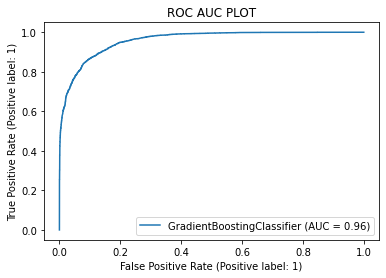

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gb,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

Auc score is 96%

In [75]:
original=np.array(y_test)
predicted=np.array(gbpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
9720,1,1
9721,1,1
9722,1,1
9723,0,0


# SAVING BEST MODEL

In [85]:
import joblib
joblib.dump(gb,'gbfile.obj')

['gbfile.obj']